# Функции

In [5]:
#простая функция

def print_hello_world():
    print("Hello World!")

In [6]:
#вызов функции
print_hello_world()

Hello World!


In [7]:
# косвенные вызовы функции
#как пременная
my_func = print_hello_world
my_func()

# как элемент листа
my_list = [1, 2, 3, print_hello_world]
my_list[3]()

#как элемент словаря
my_dict = {
    "age": 10,
    "func": print_hello_world
}
my_dict['func']()

Hello World!
Hello World!
Hello World!


In [8]:
# функция с аргументами
def my_print(text):
    print(text)

my_print("Hello World!")
my_print("Another text")

Hello World!
Another text


In [9]:
# функция которая возвращает результат

def a_plus_b(firts_argiment, second_argument):
    return firts_argiment + second_argument

a = 1
b = 5

result = a_plus_b(a, b)
print(result)

6


In [10]:
# вызов функции с именованными параметрами

result = a_plus_b(firts_argiment=a, second_argument=b)
print(result)

6


In [11]:
# возврат нескольких значений

def function_with_2_returns(a , b):
    return a, b

result = function_with_2_returns(a, b)
print(result, type(result))

(1, 5) <class 'tuple'>


In [12]:
# функции с предопределенными аргументами

from datetime import datetime

def get_time_now(need_log=False):
    time_now = datetime.now()
    
    if need_log:
        print(f"Внутренний лог времени: {time_now}")
    
    return time_now

print(f"Внешний лог времени: {get_time_now()}\n")
print(f"Внешний лог времени: {get_time_now(need_log=True)}\n")


Внешний лог времени: 2019-09-03 17:09:37.130836

Внутренний лог времени: 2019-09-03 17:09:37.130836
Внешний лог времени: 2019-09-03 17:09:37.130836



In [13]:
# вложенные функции

def solver():
    def plus(a, b):
        return a + b
    def minus(a, b):
        return a - b
    def mult(a, b):
        return a * b
    def div(a, b):
        return a / b
    
    result1 = mult(plus(10, 6), 5)
    
    result2 = div(20, minus(10, 5))
    print(result1, result2)

solver()
#plus(10, 5)

80 4.0


In [14]:
# вложенные функции
def first_level():
    print("1")
    def second_level():
        print("2")
        def third_level():
            print('3')
            def fourth_level():
                print('4')
                return
            return fourth_level()
        return third_level()
    return second_level()
return first_level()
first_level()

1
2
3
4


# Аргументы функций

In [11]:
# передача аргументов так как есть
def calculate(a, b, c):
    return a + b + c

print(calculate(1,1,1))

3


In [12]:
# передача аргументов по именам

print(calculate(a=1, b=1, c=1))

3


In [13]:
# дефолтные значения аргументов

def calculate_with_default_variables(a=1, b=2, c=3):
    return a + b + c

In [16]:
print(calculate_with_default_variables(1,1,1))

3


In [17]:
print(calculate_with_default_variables())

6


In [18]:
# порядок записи аргументов

def new_calculate(a, b=1):
    return a + b

print(new_calculate(1))

2


In [19]:
print(new_calculate(1, 4))

5


In [24]:
# произвольные значения аргументов

def new_new_func(*args):
    result = 0
    for i in args:
        result += i
    
    return result

print(new_new_func(1,1,1,1,1,1,1,1,1,1,1,1))

12


In [26]:
# именованныя набор произвольных аргументов

def new_func_with_dict(**kwargs):
    print(kwargs)
    

new_func_with_dict(a = 1, lol="loooool", new_variable=[1,2,3,4])

{'a': 1, 'lol': 'loooool', 'new_variable': [1, 2, 3, 4]}


# области видимости

In [15]:
index = 10

def func(index):
    for i in range(index):
        print("Hey!")

func(5)

Hey!
Hey!
Hey!
Hey!
Hey!


In [16]:
def func2():
    for i in range(index):
        print("Hey!")
func2()

Hey!
Hey!
Hey!
Hey!
Hey!
Hey!
Hey!
Hey!
Hey!
Hey!


In [17]:
#явно не объявлена, но видна во вне if
outer = "Внешняя переменная"
a = 1
if a == 1:
    inner = "Внутренняя переменная"

print(outer)
print(inner)

Внешняя переменная
Внутренняя переменная


In [18]:
#Во избежании ощибок внутренние переменные лучше всего объявлять во вне
outer = "Внешняя переменная"
inner = None
a = 1
if a == 1:
    inner = "Внутренняя переменная"

print(outer)
print(inner)

Внешняя переменная
Внутренняя переменная


In [19]:
def my_func(a, b):
    print(x)
    #что будет если закоментировать х = 5?
    x = 5
    print(x)


x = 10
my_func(1, 2)
print(x)

UnboundLocalError: local variable 'x' referenced before assignment

###### Глобальная область видимости

In [20]:
#исправляем предыдущий пример при помощи оператора global
def my_func(a, b):
    global x
    print(x)
    x = 5
    print(x)
 
x = 10
my_func(1, 2)
print(x)

10
5
5


In [21]:
#теперь мы изменили внутренню переменную, которая в данный момент имеет локальную область видимости только внутри фунции
def my_func(a, b):
    global c
    b, a = a, b
    d = 'Mike'
    print(a, b, c, d)
 
 
a, b, c, d = 1, 2, 'c is global', 4
my_func(1, 2)
print(a, b, c, d)

#поэтому когда мы вышли в основной поток, мы увидели снова старое значение, а не то, которое было указано внутри функции my_func

2 1 c is global Mike
1 2 c is global 4


## LAMBDA выражения

In [22]:
func = lambda x, y: x + y
func(1, 2)

3

In [23]:
(lambda h, w: print(h + " " + w))(h="Hellow", w='World')

Hellow World


lambda функции, в отличие от обычной, не требуется инструкция return, а в остальном, ведет себя точно так же

# рекурсия


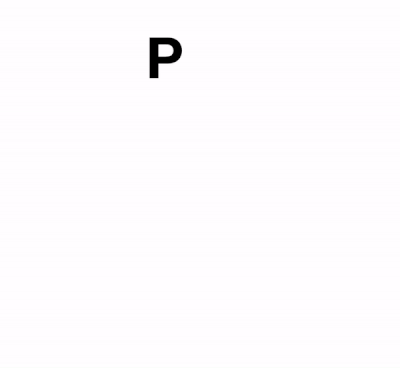 

In [24]:
def factorial(n):
    res = 1
    for i in range(1, n + 1):
        res *= i
    return res

print(factorial(3))
print(factorial(5))


6
120


In [25]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n - 1)

print(factorial(3))
print(factorial(5))

6
120


In [26]:
# более наглядно это видно в IDE --> pycharm в режиме дебага

# задача 1

In [27]:
from datetime import datetime
import time

def time_writer():
    while True:
        print(f"H: {datetime.now().hour}\nM: {datetime.now().minute}\nS: {datetime.now().second}\n")
        
        time.sleep(10)
time_writer()

H: 17
M: 9
S: 41

H: 17
M: 9
S: 51

H: 17
M: 10
S: 1

H: 17
M: 10
S: 11

H: 17
M: 10
S: 21

H: 17
M: 10
S: 31

H: 17
M: 10
S: 41

H: 17
M: 10
S: 51

H: 17
M: 11
S: 1

H: 17
M: 11
S: 11

H: 17
M: 11
S: 21

H: 17
M: 11
S: 31

H: 17
M: 11
S: 41

H: 17
M: 11
S: 51

H: 17
M: 12
S: 1

H: 17
M: 12
S: 11

H: 17
M: 12
S: 21

H: 17
M: 12
S: 31

H: 17
M: 12
S: 41

H: 17
M: 12
S: 51

H: 17
M: 13
S: 1

H: 17
M: 13
S: 11

H: 17
M: 13
S: 21



KeyboardInterrupt: 

# задача 2


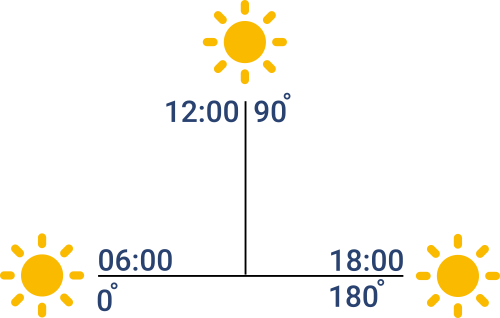

In [29]:
from datetime import datetime
def sun_angle(time_now):
    time = datetime.strptime(time_now, "%H:%M").time()
    print(time, type(time), datetime(2005, 7, 14, 6, 0).time())
    if datetime(2005, 7, 14, 6, 0).time() > time or time > datetime(2005, 7, 14, 18, 0).time():
        return "I don't see the sun!"
    else:
        angle_in_minute = 180 / (12 * 60)
        now_m = (time.hour - 6) * 60 + time.minute
        return angle_in_minute * now_m

In [31]:
# если не будет ошибрк значит все ок, иначе у вас ошибка
assert(sun_angle("07:00") == 15)
assert(sun_angle("12:15") == 93.75)
assert(sun_angle("01:23") == "I don't see the sun!")

print("OK")

07:00:00 <class 'datetime.time'> 06:00:00
12:15:00 <class 'datetime.time'> 06:00:00
01:23:00 <class 'datetime.time'> 06:00:00
OK
